# Init

In [37]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms

batch_size = 64
num_classes = 10
learning_rate = 0.001
num_epochs = 30

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Dataset CIFAR10

Реформатирование изображение

In [39]:
all_transforms = transforms.Compose([transforms.Resize((32,32)),
                                     transforms.ToTensor(),
                                     transforms.Normalize(mean=[0.4914, 0.4822, 0.4465],
                                                          std=[0.2023, 0.1994, 0.2010])
                                     ])

Датасеты для обучения и теста

In [40]:
train_dataset = torchvision.datasets.CIFAR10(root = './data',
                                             train = True,
                                             transform = all_transforms,
                                             download = True)

test_dataset = torchvision.datasets.CIFAR10(root = './data',
                                            train = False,
                                            transform = all_transforms,
                                            download=True)

Files already downloaded and verified
Files already downloaded and verified


Загрузчики датасетов - чтобы не держать весь датасет в ОЗУ

In [41]:
train_loader = torch.utils.data.DataLoader(dataset = train_dataset,
                                           batch_size = batch_size,
                                           shuffle = True)


test_loader = torch.utils.data.DataLoader(dataset = test_dataset,
                                           batch_size = batch_size,
                                           shuffle = True)

Класс нейронной сети, наследуется от nn.Module из pytorch
Задаём слои
forward - порядок, в котором данные проходят через нейронку

Cond2d - свёрточные слои, задаём получаемые каналы (начинаем с 3х т.к. RGB), каналы после свёртки, размер свёрт. ядра
MaxPooling - уменьшение размеров изображения путём сложения блоков пикселей

In [42]:
# Creating a CNN class
class ConvNeuralNet(nn.Module):
	#  Determine what layers and their order in CNN object
    def __init__(self, num_classes):
        super(ConvNeuralNet, self).__init__()
        self.conv_layer1 = nn.Conv2d(in_channels=3, out_channels=32, kernel_size=3)
        self.conv_layer2 = nn.Conv2d(in_channels=32, out_channels=32, kernel_size=3)
        self.max_pool1 = nn.MaxPool2d(kernel_size = 2, stride = 2)

        self.conv_layer3 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3)
        self.conv_layer4 = nn.Conv2d(in_channels=64, out_channels=64, kernel_size=3)
        self.max_pool2 = nn.MaxPool2d(kernel_size = 2, stride = 2)

        self.fc1 = nn.Linear(1600, 128)
        self.relu1 = nn.ReLU()
        self.fc2 = nn.Linear(128, num_classes)

    # Progresses data across layers
    def forward(self, x):
        out = self.conv_layer1(x)
        out = self.conv_layer2(out)
        out = self.max_pool1(out)

        out = self.conv_layer3(out)
        out = self.conv_layer4(out)
        out = self.max_pool2(out)

        out = out.reshape(out.size(0), -1)

        out = self.fc1(out)
        out = self.relu1(out)
        out = self.fc2(out)
        return out

In [43]:
model = ConvNeuralNet(num_classes)

# Set Loss function with criterion
criterion = nn.CrossEntropyLoss()

# Set optimizer with optimizer
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate, weight_decay = 0.005, momentum = 0.9)

total_step = len(train_loader)

Accuracy of the network on the 50000 train images: 40.498 %
Epoch [1/30], Loss: 1.8398
Accuracy of the network on the 50000 train images: 48.214 %
Epoch [2/30], Loss: 1.7340
Accuracy of the network on the 50000 train images: 53.706 %
Epoch [3/30], Loss: 1.4585
Accuracy of the network on the 50000 train images: 57.204 %
Epoch [4/30], Loss: 1.3886
Accuracy of the network on the 50000 train images: 60.108 %
Epoch [5/30], Loss: 1.0563
Accuracy of the network on the 50000 train images: 62.526 %
Epoch [6/30], Loss: 1.3447
Accuracy of the network on the 50000 train images: 64.584 %
Epoch [7/30], Loss: 1.0776
Accuracy of the network on the 50000 train images: 65.632 %
Epoch [8/30], Loss: 0.9782
Accuracy of the network on the 50000 train images: 68.596 %
Epoch [9/30], Loss: 1.2776
Accuracy of the network on the 50000 train images: 71.264 %
Epoch [10/30], Loss: 0.8668
Accuracy of the network on the 50000 train images: 72.558 %
Epoch [11/30], Loss: 0.8946
Accuracy of the network on the 50000 trai

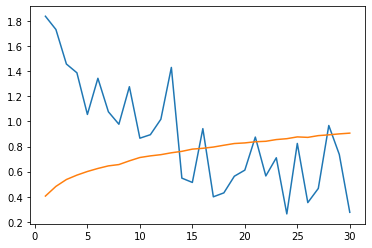

In [44]:
# We use the pre-defined number of epochs to determine how many iterations to train the network on
import time
import matplotlib.pyplot as plt

start = time.time()
losses = []
scores = []
for epoch in range(num_epochs):
	#Load in the data in batches using the train_loader object
    for i, (images, labels) in enumerate(train_loader):
        # Move tensors to the configured device
        images = images.to(device)
        labels = labels.to(device)

        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)

        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    with torch.no_grad():
        correct = 0
        total = 0
        for images, labels in train_loader:
            images = images.to(device)
            labels = labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
        print('Accuracy of the network on the {} train images: {} %'.format(50000, 100 * correct / total))
        scores.append(correct / total)
    
    print('Epoch [{}/{}], Loss: {:.4f}'.format(epoch+1, num_epochs, loss.item()))
    losses.append(loss.item())
print(time.time() - start)

xs = list(range(1, num_epochs + 1))
plt.plot(xs, losses, label = 'loses')
plt.show()
plt.plot(xs, scores, label = 'scores')
plt.show()

# MNIST

In [46]:
device2 = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

train_dataset2 = torchvision.datasets.MNIST(root = './data',
                                             train = True,
                                             transform = all_transforms,
                                             download = True)

test_dataset2 = torchvision.datasets.MNIST(root = './data',
                                            train = False,
                                            transform = all_transforms,
                                            download=True)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



In [50]:
train_loader2 = torch.utils.data.DataLoader(dataset = train_dataset,
                                           batch_size = batch_size,
                                           shuffle = True)


test_loader2 = torch.utils.data.DataLoader(dataset = test_dataset,
                                           batch_size = batch_size,
                                           shuffle = True)

In [51]:
model2 = ConvNeuralNet(num_classes)

# Set optimizer with optimizer
optimizer2 = torch.optim.SGD(model2.parameters(), lr=learning_rate, weight_decay = 0.005, momentum = 0.9)

total_step2 = len(train_loader2)

Accuracy of the network on the 50000 train images: 39.478 %
Epoch [1/30], Loss: 2.1818
Accuracy of the network on the 50000 train images: 47.886 %
Epoch [2/30], Loss: 1.7992
Accuracy of the network on the 50000 train images: 52.098 %
Epoch [3/30], Loss: 1.4986
Accuracy of the network on the 50000 train images: 56.004 %
Epoch [4/30], Loss: 0.8252
Accuracy of the network on the 50000 train images: 59.07 %
Epoch [5/30], Loss: 1.0469
Accuracy of the network on the 50000 train images: 61.48 %
Epoch [6/30], Loss: 1.1478
Accuracy of the network on the 50000 train images: 63.98 %
Epoch [7/30], Loss: 1.1405
Accuracy of the network on the 50000 train images: 65.658 %
Epoch [8/30], Loss: 1.1069
Accuracy of the network on the 50000 train images: 68.586 %
Epoch [9/30], Loss: 1.0493
Accuracy of the network on the 50000 train images: 69.76 %
Epoch [10/30], Loss: 0.5806
Accuracy of the network on the 50000 train images: 70.828 %
Epoch [11/30], Loss: 0.8088
Accuracy of the network on the 50000 train im

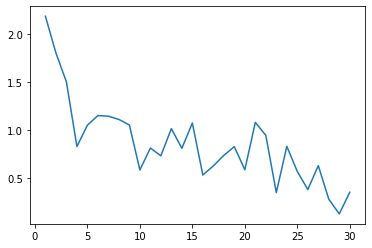

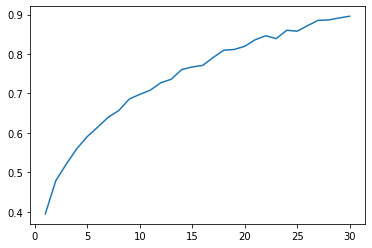

In [52]:
start = time.time()
losses = []
scores = []
for epoch in range(num_epochs):
	#Load in the data in batches using the train_loader object
    for i, (images, labels) in enumerate(train_loader2):
        # Move tensors to the configured device
        images = images.to(device2)
        labels = labels.to(device2)

        # Forward pass
        outputs = model2(images)
        loss = criterion(outputs, labels)

        # Backward and optimize
        optimizer2.zero_grad()
        loss.backward()
        optimizer2.step()

    with torch.no_grad():
        correct = 0
        total = 0
        for images, labels in train_loader:
            images = images.to(device2)
            labels = labels.to(device2)
            outputs = model2(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
        print('Accuracy of the network on the {} train images: {} %'.format(50000, 100 * correct / total))
        scores.append(correct / total)
    
    print('Epoch [{}/{}], Loss: {:.4f}'.format(epoch+1, num_epochs, loss.item()))
    losses.append(loss.item())
print(time.time() - start)

xs = list(range(1, num_epochs + 1))
plt.plot(xs, losses, label = 'loses')
plt.show()
plt.plot(xs, scores, label = 'scores')
plt.show()